In [1]:
# Import libraries + utility functions
import pandas as pd, matplotlib.pyplot as plt

def get_speed_up(x):
    return df[df['V_CPU'] == 1][['N_SAMPLES', 'EXECUTION_TIME']][df[df['V_CPU'] == 1][['N_SAMPLES', 'EXECUTION_TIME']]['N_SAMPLES'] == x['N_SAMPLES']]['EXECUTION_TIME'] / x['EXECUTION_TIME']

def get_samples_over_vcpus(x):
    return x['N_SAMPLES'] / x['V_CPU']

# KNN Distributed - Execution details analysis

The well-known **K-Nearest Neighbor (KNN) classifier** has been **distributed with OpenMPI (on C++)**. <br>
But now a further analysis on the performances of the implemented solution is needed, considering different aspects for example what happens if the number of core is increased to the execution time (mantaining the number of samples fixed), and many other things

In order to do so, **four different clusters** have been created using **Google Cloud Platform** (GCP), with the following configurations:
- **Fat cluster**: three e2-highcpu-8 (8vCPU, 8GBRAM)
    - **Intra-regional**: same region (Central America)
    - **Infra-regional**: different regions (1 Central Europe, 1 East Asia, 1 West America)
- **Light cluster**: six e2-small (2vCPU, 2GBRAM)
    - **Intra-regional**: same region (Central America)
    - **Infra-regional**: different regions (2 Central Europe, 2 East Asia and 2 West America)

In this specific notebook it will be shown, and commented, the obtained results performing the distributed KNN on different previously designed tests, for each cluster.

### Strong scalability

Fixed-size problem on increasing resources (clusters of increasing dimension). It has been studied through the computation of:
- **speed−up = [t(1) / t(n)]**

Where *t(1)* is the amount of time needed to complete the task with one process, while *t(n)* is the amount of time to complete the same task with n processing elements.


### Weak scalability

Increasing the number of cores, while keeping the load per core constant.

# Fat cluster

## Intra-regional (same region)

In [2]:
df = pd.read_csv('Fat-cluster/executions-details-intra.csv', delimiter=', ', engine='python')
df['N_SAMPLES/V_CPU'] = df.apply(lambda x: get_samples_over_vcpus(x), axis=1)
df['SPEED_UP'] = df.apply(lambda x: get_speed_up(x), axis=1).max(axis=1)

df

,N_SAMPLES,V_CPU,EXECUTION_TIME,N_SAMPLES/V_CPU,SPEED_UP
0,1200,1,4.248240,1200.0,1.000000
1,12000,1,577.889000,12000.0,1.000000
2,24000,1,2522.450000,24000.0,1.000000
3,1200,4,1.108840,300.0,3.831247
4,12000,4,149.880000,3000.0,3.855678
5,24000,4,645.486000,6000.0,3.907831
6,1200,8,0.826471,150.0,5.140217
7,12000,8,104.675000,1500.0,5.520793
8,24000,8,461.487000,3000.0,5.465918
9,1200,12,0.593171,100.0,7.161915


### Strong scalability

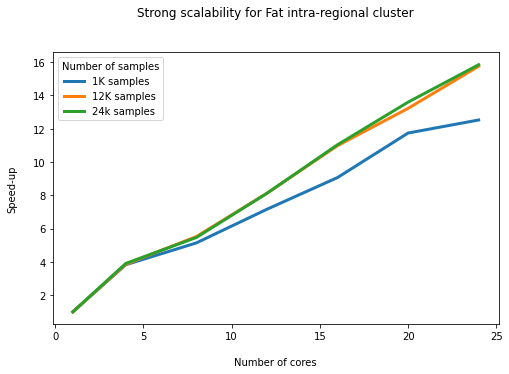

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))

for key, grp in df.groupby(['N_SAMPLES']):
    ax = grp.plot(ax=ax, kind='line', x='V_CPU', y='SPEED_UP', legend=True, linewidth=3)

plt.title('Strong scalability for Fat intra-regional cluster\n\n')
plt.legend(title='Number of samples', labels=['1K samples', '12K samples', '24k samples'], loc='best')
plt.xlabel('\nNumber of cores')
plt.ylabel('Speed-up\n')
plt.show()

### Weak scalability

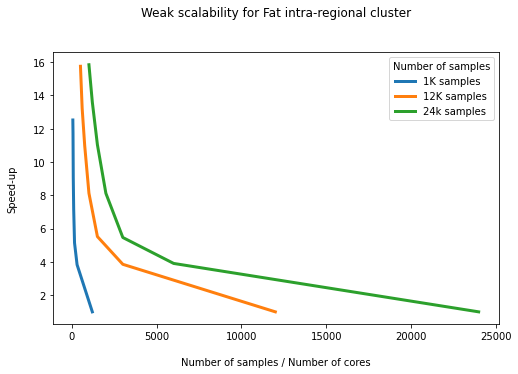

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))

for key, grp in df.groupby(['N_SAMPLES']):
    ax = grp.plot(ax=ax, kind='line', x='N_SAMPLES/V_CPU', y='SPEED_UP', legend=True, linewidth=3)

plt.title('Weak scalability for Fat intra-regional cluster\n\n')
plt.legend(title='Number of samples', labels=['1K samples', '12K samples', '24k samples'], loc='best')
plt.xlabel('\nNumber of samples / Number of cores')
plt.ylabel('Speed-up\n')
plt.show()

## Infra-regional (different regions)

Is there really a difference between the infra-regional and intra-regional fat cluster performed tests?
Lets see.<br><br>
In order to do so we made the difference between the execution times of the fat infra regional cluster and intra regional cluster (considering the same test configuration) and divide it by the average of the two execution time values (for infra and intra regional).

In [5]:
infra_df = pd.read_csv('Fat-cluster/executions-details-infra.csv', delimiter=', ', engine='python')

In [6]:
execution_time_differences_norm = [infra_df['EXECUTION_TIME'] - df['EXECUTION_TIME']] / pd.concat([infra_df['EXECUTION_TIME'], df['EXECUTION_TIME']]).mean()
print('Execution time differences between light and fat cluster\n\nMean:', round(execution_time_differences_norm.mean(), 3), '\nVariance:', round(execution_time_differences_norm.var(), 5))

Execution time differences between light and fat cluster

Mean: 0.015 
Variance: 0.00037


Very small difference. The infra regional takes slightly more time with respect to the intra regional (negligible).

# Light cluster

## Intra-regional (same region)

In [7]:
df = pd.read_csv('Light-cluster/executions-details-intra.csv', delimiter=', ', engine='python')
df['N_SAMPLES/V_CPU'] = df.apply(lambda x: get_samples_over_vcpus(x), axis=1)
df['SPEED_UP'] = df.apply(lambda x: get_speed_up(x), axis=1).max(axis=1)

df

,N_SAMPLES,V_CPU,EXECUTION_TIME,N_SAMPLES/V_CPU,SPEED_UP
0,1200,1,4.248240,1200.0,1.000000
1,12000,1,577.889000,12000.0,1.000000
2,24000,1,2522.450000,24000.0,1.000000
3,1200,2,2.951690,600.0,1.439257
4,12000,2,391.750000,6000.0,1.475147
5,24000,2,1660.530000,12000.0,1.519063
6,1200,4,1.711870,300.0,2.481637
7,12000,4,215.658000,3000.0,2.679655
8,24000,4,922.493000,6000.0,2.734384
9,1200,8,0.879243,150.0,4.831702


### Strong scalability

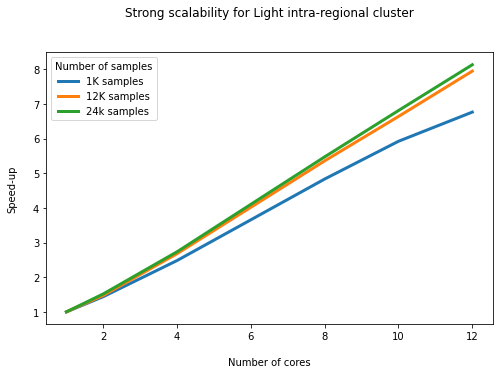

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

for key, grp in df.groupby(['N_SAMPLES']):
    ax = grp.plot(ax=ax, kind='line', x='V_CPU', y='SPEED_UP', legend=True, linewidth=3)

plt.title('Strong scalability for Light intra-regional cluster\n\n')
plt.legend(title='Number of samples', labels=['1K samples', '12K samples', '24k samples'], loc='best')
plt.xlabel('\nNumber of cores')
plt.ylabel('Speed-up\n')
plt.show()

### Weak scalability

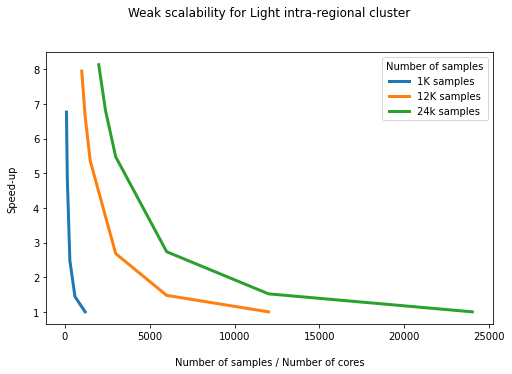

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))

for key, grp in df.groupby(['N_SAMPLES']):
    ax = grp.plot(ax=ax, kind='line', x='N_SAMPLES/V_CPU', y='SPEED_UP', legend=True, linewidth=3)

plt.title('Weak scalability for Light intra-regional cluster\n\n')
plt.legend(title='Number of samples', labels=['1K samples', '12K samples', '24k samples'], loc='best')
plt.xlabel('\nNumber of samples / Number of cores')
plt.ylabel('Speed-up\n')
plt.show()

## Infra-regional (different regions)

Is there really a difference between the infra-regional and intra-regional fat cluster performed tests?
Lets see (test performed as previously).

In [10]:
infra_df = pd.read_csv('Light-cluster/executions-details-infra.csv', delimiter=', ', engine='python')

In [11]:
execution_time_differences_norm = [infra_df['EXECUTION_TIME'] - df['EXECUTION_TIME']] / pd.concat([infra_df['EXECUTION_TIME'], df['EXECUTION_TIME']]).mean()
print('Execution time differences between light and fat cluster\n\nMean:', round(execution_time_differences_norm.mean(), 3), '\nVariance:', round(execution_time_differences_norm.var(), 5))

Execution time differences between light and fat cluster

Mean: 0.012 
Variance: 0.00347
